This project is Unsupervised and supervised learning in the Formula 1 World:
We Will :

1. Cluster drivers based on similarity (Unsupervised Learning)
2. Predict driver performance in the next race (Supervised Learning)

To do that, we need structured race data for all drivers from 2018 to 2023. So we are going to use FastF1 API for our data.

    

In [1]:
%pip install fastf1
import fastf1 as f1

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 12.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -------------------------- ------------- 8.4/12.6 MB 49.3 MB/s eta 0:00:01
   -------------------------------------- - 12.1/12.6 MB 30.2 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 28.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   --------------------- ------------------ 6.3/11.5 MB 31.8 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 29.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ----- ----------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
if not os.path.exists('f1_cache'):
    os.makedirs('f1_cache')
    
f1.Cache.enable_cache('f1_cache') # so We don't need to download the data again and again

In [3]:
from fastf1 import events

schedule_2023 = events.get_event_schedule(2023)
print(schedule_2023[['EventName']])

                   EventName
0         Pre-Season Testing
1         Bahrain Grand Prix
2   Saudi Arabian Grand Prix
3      Australian Grand Prix
4      Azerbaijan Grand Prix
5           Miami Grand Prix
6          Monaco Grand Prix
7         Spanish Grand Prix
8        Canadian Grand Prix
9        Austrian Grand Prix
10        British Grand Prix
11      Hungarian Grand Prix
12        Belgian Grand Prix
13          Dutch Grand Prix
14        Italian Grand Prix
15      Singapore Grand Prix
16       Japanese Grand Prix
17          Qatar Grand Prix
18  United States Grand Prix
19    Mexico City Grand Prix
20      São Paulo Grand Prix
21      Las Vegas Grand Prix
22      Abu Dhabi Grand Prix


In [4]:
race = f1.get_session(2023, 'Monza', 'R') # 2023 is the year, 'Bahrain Grand Prix' is the race name, 'R' is the race type
race.load()


core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

In [5]:
race.results


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,2.0,NaT,NaT,NaT,0 days 01:13:41.143000,Finished,25.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,2.0,2,5.0,NaT,NaT,NaT,0 days 00:00:06.064000,Finished,18.0
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,3.0,3,1.0,NaT,NaT,NaT,0 days 00:00:11.193000,Finished,15.0
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,4.0,4,3.0,NaT,NaT,NaT,0 days 00:00:11.377000,Finished,12.0
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,5.0,5,4.0,NaT,NaT,NaT,0 days 00:00:23.028000,Finished,10.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,6.0,6,8.0,NaT,NaT,NaT,0 days 00:00:42.679000,Finished,8.0
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,THA,7.0,7,6.0,NaT,NaT,NaT,0 days 00:00:45.106000,Finished,6.0
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,GBR,8.0,8,9.0,NaT,NaT,NaT,0 days 00:00:45.449000,Finished,4.0
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,9.0,9,10.0,NaT,NaT,NaT,0 days 00:00:46.294000,Finished,2.0
77,77,V BOTTAS,BOT,bottas,Alfa Romeo,C92D4B,alfa,Valtteri,Bottas,Valtteri Bottas,...,FIN,10.0,10,14.0,NaT,NaT,NaT,0 days 00:01:04.056000,Finished,1.0


# 🧪 All the above was just **testing FastF1**


In [6]:
import fastf1
import pandas as pd
import numpy as np

def Extract_race_info(year, GP):
    try:
        session = fastf1.get_session(year, GP, 'R')
        session.load()
    except Exception as e:
        print(f"Failed to load {GP} {year}: {e}")
        return pd.DataFrame()  

    race_results = session.results
    laps = session.laps
    data = []

    for driver in race_results['Abbreviation']:
        driver_laps = laps.pick_driver(driver).pick_quicklaps()
        if driver_laps.empty:
            continue

        avg_lap_time = driver_laps['LapTime'].dt.total_seconds().mean()
        finish_pos = race_results.loc[race_results['Abbreviation'] == driver, 'Position'].values[0]
        quali_pos = race_results.loc[race_results['Abbreviation'] == driver, 'GridPosition'].values[0]
        team = race_results.loc[race_results['Abbreviation'] == driver, 'TeamName'].values[0]
        status = race_results.loc[race_results['Abbreviation'] == driver, 'Status'].values[0]
        retired = int('Finished' not in status)

        position_change = finish_pos - quali_pos

        data.append({
            'driver': driver,
            'team': team,
            'qualifying_position': quali_pos,
            'finish_position': finish_pos,
            'retired': retired,
            'avg_lap_time': avg_lap_time,
            'position_change': position_change,
            'GP' : GP,
            'year': year
        })

    return pd.DataFrame(data)  


In [7]:
df = Extract_race_info(2023, 'Monza')


core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

In [8]:
df

,driver,team,qualifying_position,finish_position,retired,avg_lap_time,position_change,GP,year
0,VER,Red Bull Racing,2.0,1.0,0,86.309660,-1.0,Monza,2023
1,PER,Red Bull Racing,5.0,2.0,0,86.439580,-3.0,Monza,2023
2,SAI,Ferrari,1.0,3.0,0,86.401265,2.0,Monza,2023
3,LEC,Ferrari,3.0,4.0,0,86.533560,1.0,Monza,2023
4,RUS,Mercedes,4.0,5.0,0,86.570939,1.0,Monza,2023
5,HAM,Mercedes,8.0,6.0,0,86.825104,-2.0,Monza,2023
6,ALB,Williams,6.0,7.0,0,87.172880,1.0,Monza,2023
7,NOR,McLaren,9.0,8.0,0,87.206200,-1.0,Monza,2023
8,ALO,Aston Martin,10.0,9.0,0,86.967667,-1.0,Monza,2023
9,BOT,Alfa Romeo,14.0,10.0,0,87.317553,-4.0,Monza,2023


Up until now this was only one race, Now we  will add 2020-2023 races

In [9]:
def races_range(start_year,end_year):
    all_data = pd.DataFrame()
    races = ['Monza','Spa','Silverstone','Hungry','Bahrain']

    for year in range(start_year,end_year+1):
        for race in races:
            df_race = Extract_race_info(year,race)
            if not df_race.empty:
                all_data = pd.concat([all_data,df_race],ignore_index=True)
    
    return all_data

In [10]:
all_race_data = races_range(2019, 2023)

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 16 completed the race distance 00:00.092000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['16', '77', '44', '3', '27', '23', '11', '33', '99', '4', '10', '1

In [11]:
all_race_data

,driver,team,qualifying_position,finish_position,retired,avg_lap_time,position_change,GP,year
0,LEC,Ferrari,1.0,1.0,0,84.217163,0.0,Monza,2019
1,BOT,Mercedes,3.0,2.0,0,84.281980,-1.0,Monza,2019
2,HAM,Mercedes,2.0,3.0,0,84.458979,1.0,Monza,2019
3,RIC,Renault,5.0,4.0,0,85.186694,-1.0,Monza,2019
4,HUL,Renault,6.0,5.0,0,85.345720,-1.0,Monza,2019
...,...,...,...,...,...,...,...,...,...
483,ZHO,Alfa Romeo,13.0,16.0,1,98.711568,3.0,Bahrain,2023
484,NOR,McLaren,11.0,17.0,1,98.614667,6.0,Bahrain,2023
485,OCO,Alpine,9.0,18.0,1,99.491471,9.0,Bahrain,2023
486,LEC,Ferrari,3.0,19.0,1,98.591108,16.0,Bahrain,2023


### 🔍 Initial Data Exploration (EDA)

At this stage, we’ve built a dataset containing the performance of all drivers across selected Formula 1 races from 2020 to 2023.  
Each row represents a single driver in a single race, and includes features such as qualifying position, average lap time, retirement status, and final race position.

The goal is to explore the data and uncover patterns before we begin training machine learning models.

---

### ✅ What we’ve done so far:
- Loaded real race data using FastF1
- Selected relevant performance features
- Created a unified DataFrame with hundreds of driver records

---

### ⏭️ What’s next?
- Create **visualizations** to identify trends and correlations
- Perform **data preprocessing** (e.g., encoding categories, handling missing values)
- Train a **machine learning model** to predict position change during a race


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.histplot(data=df, x="position_change", bins=20, kde=True)

plt.title("Distribution of Position Change")
plt.xlabel("Position Change (Finish - Qualifying)")
plt.ylabel("Number of Drivers")
plt.tight_layout()
plt.show()




ModuleNotFoundError: No module named 'seaborn'

#### 1️⃣ Distribution of Position Change

This histogram shows how drivers' positions changed from qualifying to race finish.  
- Most drivers moved between -3 and +3 positions.
- The curve (KDE) shows the distribution is roughly centered around 0.
- This suggests that while some drivers improve their position, others drop, and most remain close to their starting spot.

---

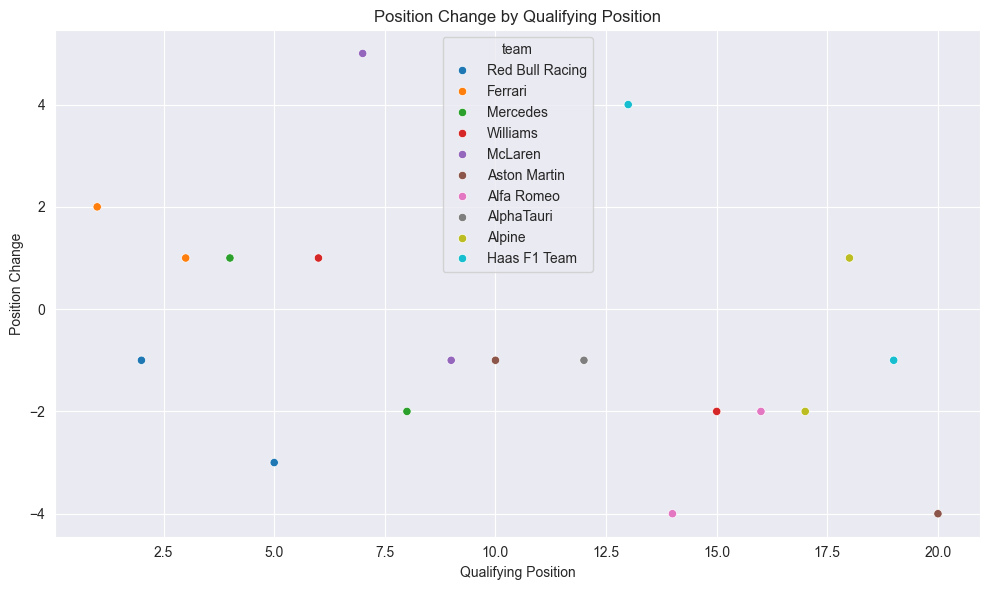

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.scatterplot(data=df, x="qualifying_position", y="position_change", hue="team", palette="tab10")

plt.title("Position Change by Qualifying Position")
plt.xlabel("Qualifying Position")
plt.ylabel("Position Change")
plt.tight_layout()
plt.show()


#### 2️⃣ Position Change by Qualifying Position (Scatter Plot)

This scatter plot compares qualifying position to how much a driver gained or lost in the race.
- Each point is a driver in a single race.
- Drivers starting from mid or back of the grid tend to gain more positions.
- Top qualifiers often lose 1–2 spots — possibly due to pit strategy, incidents, or overtakes.
- The team color helps show which constructors consistently climb or drop.

---

C:\Users\lankr\AppData\Local\Temp\ipykernel_10888\616513935.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="team", y="position_change", estimator=np.mean, ci=None)


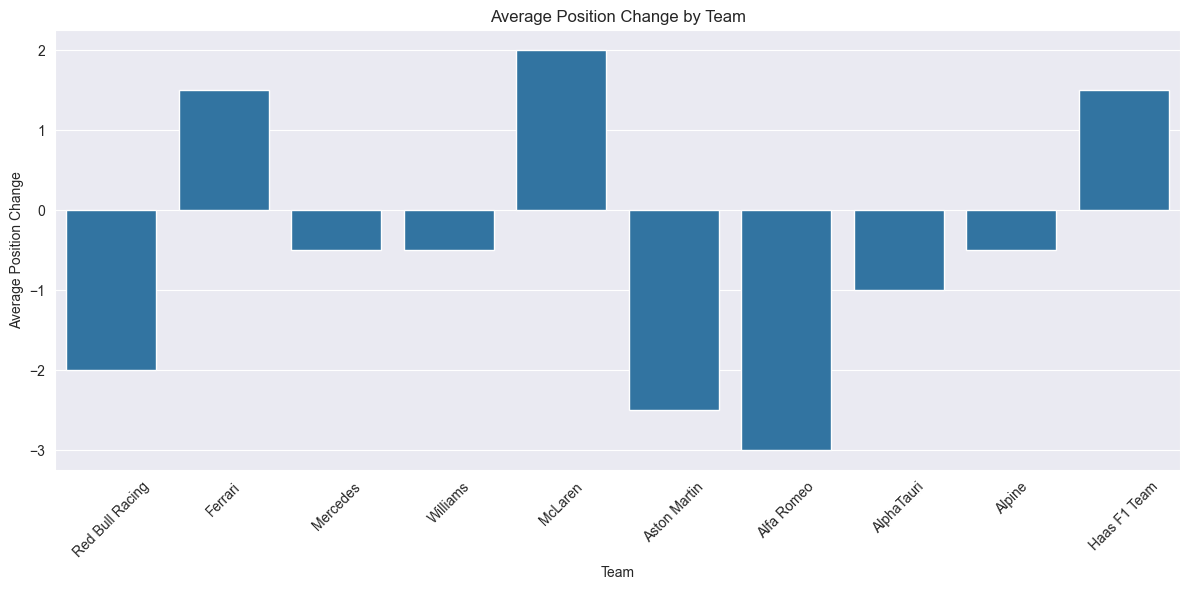

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

sns.barplot(data=df, x="team", y="position_change", estimator=np.mean, ci=None)
plt.xticks(rotation=45)

plt.title("Average Position Change by Team")
plt.xlabel("Team")
plt.ylabel("Average Position Change")
plt.tight_layout()
plt.show()


#### 3️⃣ Average Position Change by Team (Bar Plot)

This bar chart shows the average position change per team.
- McLaren and Ferrari tend to **gain** positions on average.
- Red Bull and Mercedes slightly **lose** positions on average — likely because they start at the front and have fewer places to gain.
- Alfa Romeo and Aston Martin show the biggest drops.
- Haas shows positive average gain, surprisingly strong in position climbing.

---

In [ ]:
driver_stats = all_race_data.groupby("driver").agg({
     "qualifying_position": "mean",                          
        "finish_position": "mean",                           
        "position_change": "mean",                            
        "avg_lap_time": "mean",                              
        "retired": "mean"     
    
}).reset_index()

driver_stats

,driver,qualifying_position,finish_position,position_change,avg_lap_time,retired
0,ALB,11.388889,10.222222,-1.166667,89.006245,0.333333
1,ALO,8.800000,9.333333,0.533333,89.618419,0.333333
2,BOT,6.875000,7.208333,0.333333,88.727923,0.250000
3,DEV,14.750000,13.500000,-1.250000,90.258161,0.500000
4,GAS,9.480000,11.400000,1.920000,90.808864,0.480000
5,GIO,14.133333,14.666667,0.533333,89.107092,0.733333
6,GRO,11.111111,16.444444,5.333333,88.289174,0.777778
7,HAM,3.880000,3.160000,-0.720000,87.797417,0.040000
8,HUL,9.583333,12.916667,3.333333,90.011689,0.500000
9,KUB,18.000000,16.500000,-1.500000,89.908214,0.833333


In [ ]:
driver_stats.columns = [
    "driver",               
    "avg_qualifying",       
    "avg_finish",           
    "avg_position_change",  
    "avg_lap_time",         
    "dnf_rate"              
]

In [ ]:
x = driver_stats.drop("driver" , axis=1)

In [ ]:
%pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [ ]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import StandardScaler # type: ignore

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.cluster import KMeans # type: ignore

KMeans = KMeans(n_clusters=3, random_state=42)
KMeans.fit(X_scaled)

driver_stats['cluster'] = KMeans.labels_

print(driver_stats[["driver","cluster"]])

   driver  cluster
0     ALB        2
1     ALO        2
2     BOT        2
3     DEV        0
4     GAS        1
5     GIO        0
6     GRO        1
7     HAM        2
8     HUL        1
9     KUB        0
10    KVY        0
11    LAT        0
12    LAW        2
13    LEC        2
14    MAG        0
15    MAZ        0
16    MSC        0
17    NOR        1
18    OCO        1
19    PER        2
20    PIA        1
21    RAI        0
22    RIC        1
23    RUS        0
24    SAI        2
25    SAR        0
26    STR        0
27    TSU        0
28    VER        2
29    VET        1
30    ZHO        1


### 🧠 Clustering Summary (So Far)

We created a summarized dataset with one row per driver, including:
- Average qualifying & finishing positions
- Average lap time
- Position change
- DNF rate

We standardized the data using `StandardScaler`  
Then applied `KMeans` with `k = 3` to cluster drivers based on performance.

---

### ⏭️ What’s Next:
- Analyze the characteristics of each cluster
- Visualize the clusters using PCA or TSNE
- Use this to group similar drivers (aggressive, consistent, etc.)


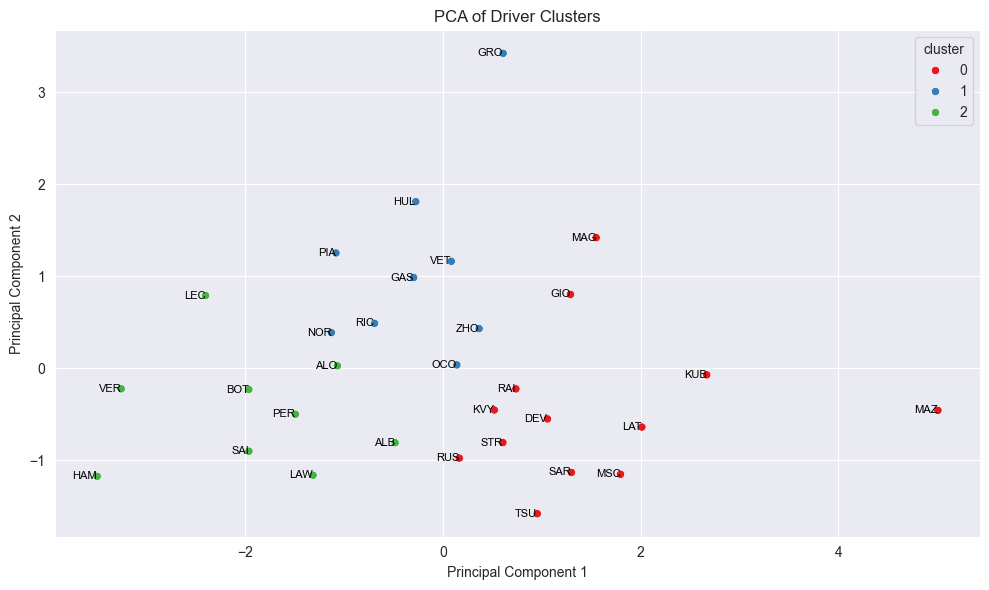

In [ ]:
from sklearn.decomposition import PCA # type: ignore
import matplotlib.pyplot as plt # type: ignore

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "cluster": driver_stats["cluster"],
    "driver": driver_stats["driver"]
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set1")

plt.title("PCA of Driver Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()

for i in range(len(pca_df)):
    plt.text(
        pca_df["PC1"][i], pca_df["PC2"][i],             
        pca_df["driver"][i],                            
        fontsize=8, ha='right', va='center', color='black'  
    )

plt.show()


In [ ]:
def analyze_winner_profile(gp_name):

    winners = all_race_data[(all_race_data['finish_position'] == 1) & (all_race_data['GP'] == gp_name)]
    if winners.empty:
        print(f"אין נתונים על מנצחים במסלול {gp_name}.")
        return

    profile_stats = winners.agg({
        'qualifying_position': ['mean', 'std'],
        'avg_lap_time': ['mean', 'std'],
        'position_change': ['mean', 'std']
    })

    print(f"Arttibuts of a Winner in {gp_name}:")
    print(profile_stats)
    
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.histplot(winners['qualifying_position'], bins=10, kde=True)
    plt.title("Qualifying Position")
    
    plt.subplot(1,3,2)
    sns.histplot(winners['avg_lap_time'], bins=10, kde=True)
    plt.title("Average Lap Time")
    
    plt.subplot(1,3,3)
    sns.histplot(winners['position_change'], bins=10, kde=True)
    plt.title("Position Change")
    
    plt.tight_layout()
    plt.show()


In [ ]:

print(all_race_data.columns)

Index(['driver', 'team', 'qualifying_position', 'finish_position', 'retired',
       'avg_lap_time', 'position_change', 'GP', 'year'],
      dtype='object')


Arttibuts of a Winner in Monza:
      qualifying_position  avg_lap_time  position_change
mean             4.400000     85.524518        -3.400000
std              3.911521      0.865199         3.911521


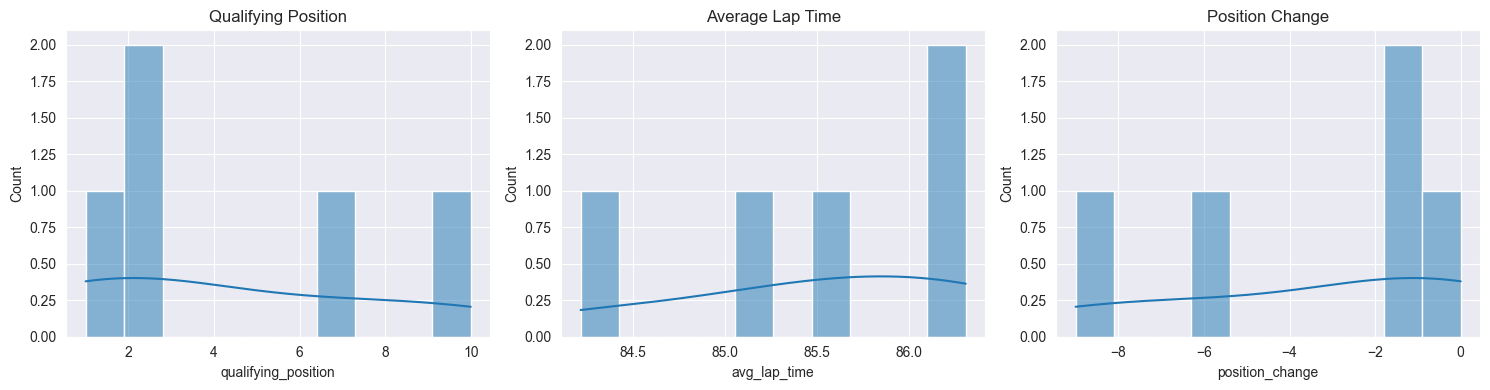

In [ ]:
analyze_winner_profile("Monza")
